# Forming Queries: Example Visualizng Depths

During the SnowEx campaigns a TON of manual snow depths were collected, surveys for hackweek showed an overhelming interest in the manual 
snow depths dataset. This tutorial shows how easy it is to get at that data in the database while learning how to build queries

Don't forget your [cheat sheets](https://snowexsql.readthedocs.io/en/latest/cheat_sheet.html)! 

**Goal**: Visualize a small subset of snow depths 

**Approach**: 

1. Connect to the DB
2. Build a query filtering by dataset and date
3. Convert to a GeoDataFrame and plot

## Process
### Step 1: Get connected

In [1]:
# Import the function to get connect to the db
from snowexsql.db import get_db

# Import our class for the points table
from snowexsql.data import PointData

# Import a useful function to format that data into a dataframe
from snowexsql.conversions import query_to_geopandas

# Import some tools to build dates 
from datetime import date

# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@db.snowexdata.org/snowex'

### Step 2: Build a query 

In [22]:
# Pick a dataset
dataset = 'depth'

# Pick a date
collection_date = date(2020, 2, 7)

# Site name
site_name = "Grand Mesa"

# Get a session
engine, session = get_db(db_name)

# The part inside the query function is what we want back, in this case all columns for the point data
qry = session.query(PointData)

# Filter by site
qry = qry.filter(PointData.site_name == site_name)

# We then want to filter by the selected the data type depth.
qry = qry.filter(PointData.type == dataset)
#qry = qry.filter(PointData.instrument=="magnaprobe")

# Filter by a date
qry = qry.filter(PointData.date == collection_date)

# Limit it to a couple hundred - just for exploration
qry = qry.limit(200)

# Execute the query and convert to geopandas in one handy function
df = query_to_geopandas(qry, engine)
print(df['instrument'].unique)

# how many did we retrieve?
print(f'{len(df.index)} records returned!')

session.close()

<bound method Series.unique of 0      magnaprobe
1      magnaprobe
2      magnaprobe
3      magnaprobe
4      magnaprobe
          ...    
195    magnaprobe
196    magnaprobe
197    magnaprobe
198    magnaprobe
199    magnaprobe
Name: instrument, Length: 200, dtype: object>
200 records returned!


### Step 3: Plot it!

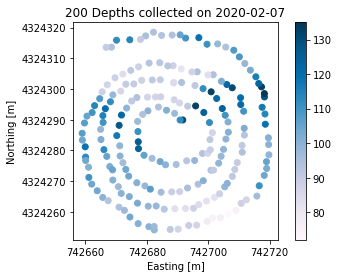

In [23]:
# Get the Matplotlib Axes object from the dataframe object, color the points by snow depth value
ax = df.plot(column='value', legend=True, cmap='PuBu')

# Use non-scientific notation for x and y ticks
ax.ticklabel_format(style='plain', useOffset=False)

# Set the various plots x/y labels and title.
ax.set_title(f'{len(df.index)} {dataset.title()}s collected on {collection_date.strftime("%Y-%m-%d")}')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')

# Close the session to avoid hanging transactions
session.close()

Lets try to filter to get the data to show only a depth spiral.

In [24]:
# Let see what instruments are available 
result = session.query(PointData.instrument).filter(PointData.type == 'depth').distinct().all()
print(result)

[(None,), ('Mala 1600 MHz GPR',), ('Mala 800 MHz GPR',), ('pulse EKKO Pro multi-polarization 1 GHz GPR',), ('pit ruler',), ('mesa',), ('magnaprobe',), ('camera',)]


**Try This:**
Go back and add a filter to reduce to just one spiral. Do you know what instrument was used to make depth spirals?


## Recap 
You just plotted snow depths and reduce the scope of the data by compounding filters on it

**You should know:**
* How to build queries using filtering
* Where a useful tools like [`query_to_geopandas`](https://snowexsql.readthedocs.io/en/latest/snowexsql.html#snowexsql.conversions.query_to_geopandas) live in the snowexsql library


If you don't feel comfortable with these, you are probably not alone, let's discuss it!
